<a href="https://colab.research.google.com/github/MarinaSandonis/03MIAR---Algoritmos-de-Optimizacion---2023/blob/main/07MIAR_Proyecto_Programacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "Deep Vision in classification tasks"
**Integrantes del grupo:**
*   Martín Garcia Ripoll Muñoz
*   Javier García-Ripoll Muñoz
*   Marina Sandonís Fernández
*   Javier Tendillo Ruiz

# 1. Carga del conjunto de datos

In [ ]:
import tensorflow as tf

print(tf.__version__)

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle
# Seleccionar el API Token personal de kaggle
from google.colab import files
files.upload()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 764.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=c9ad207dcd1f226d4e8de1c9e2daca8fb14db65f52b1e850cbbb0c391cc22fa0
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


{}

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Descargamos el dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
100% 534M/534M [00:06<00:00, 26.3MB/s]
100% 534M/534M [00:06<00:00, 88.5MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir dataset

# Descomprimimos los datos y los dejamos listos para trabajar
!unzip vegetable-image-dataset.zip -d dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/Vegetable Images/train/Radish/0001.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0002.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0003.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0004.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0005.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0006.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0007.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0008.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0009.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0010.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0011.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0012.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0013.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0014.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0015.jpg  
  inflati

In [ ]:
# Comprobamos la organización en carpetas del dataset
DATASET_DIR = "/content/dataset/Vegetable Images/"
!ls "{DATASET_DIR}"

test  train  validation


# 2. Inspección del conjunto de datos

Tamaño de la imagen:  (224, 224, 3)


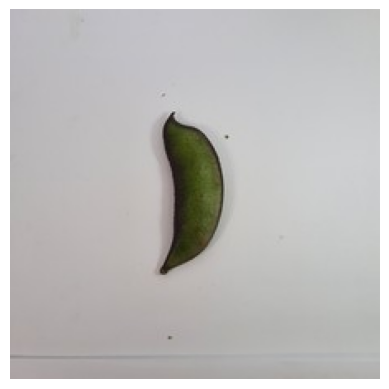

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Mostrando una imagen cualquiera
img = cv2.imread(DATASET_DIR + 'train/Bean/0026.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
print("Tamaño de la imagen: ", img.shape)

### 2.1 Número de clases y distribución de las mismas en el dataset

In [ ]:
import os

test_path = DATASET_DIR + "test"
train_path = DATASET_DIR + "train"
validation_path = DATASET_DIR + "validation"

def count_directories(path):
    return len([name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))])

print("Número de clases en test: ", count_directories(test_path))
print("Número de clases en train: ", count_directories(train_path))
print("Número de clases en validación: ", count_directories(validation_path))

Número de clases en test:  15
Número de clases en train:  15
Número de clases en validación:  15


Como puede observarse en las figuras siguientes, el número de instancias para cada clase es el mismo, es decir, las **clases** están **balanceadas** en nuestro dataset.

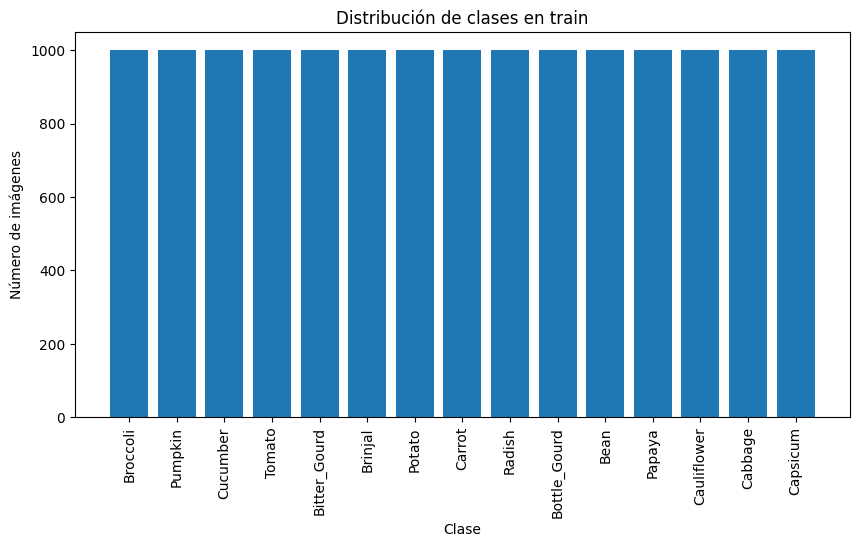

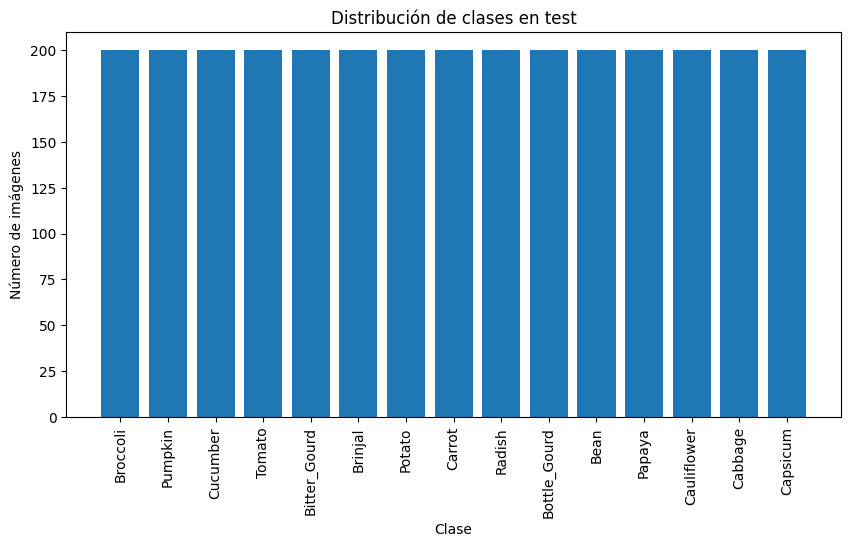

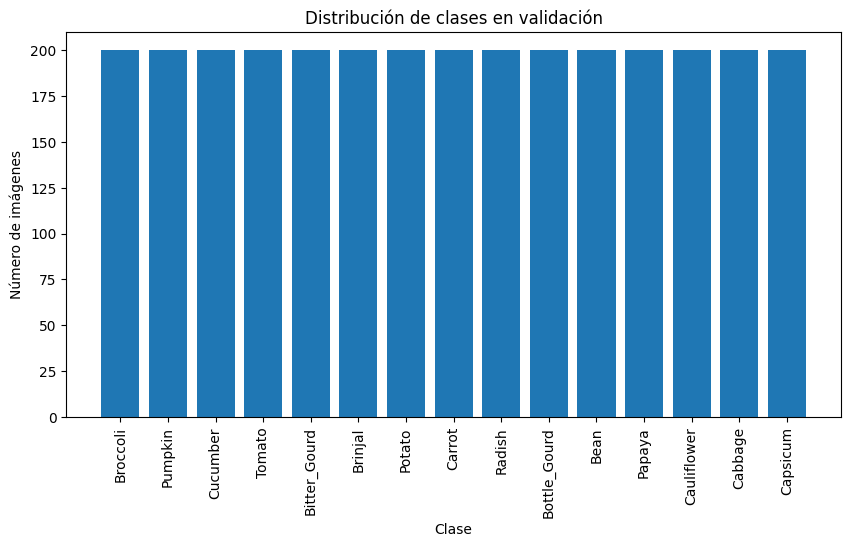

In [ ]:
import matplotlib.pyplot as plt

def count_images(dataset_path):
    class_counts = {}
    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts

def plot_counts(counts, title):
    classes = list(counts.keys())
    num_images = list(counts.values())

    plt.figure(figsize=(10, 5))
    plt.bar(classes, num_images)
    plt.title(title)
    plt.xlabel('Clase')
    plt.ylabel('Número de imágenes')
    plt.xticks(rotation='vertical')
    plt.show()

train_counts = count_images(train_path)
test_counts = count_images(test_path)
validation_counts = count_images(validation_path)

plot_counts(train_counts, 'Distribución de clases en train')
plot_counts(test_counts, 'Distribución de clases en test')
plot_counts(validation_counts, 'Distribución de clases en validación')

### 2.2 Distribución de los conjuntos de entrenamiento, test y validación

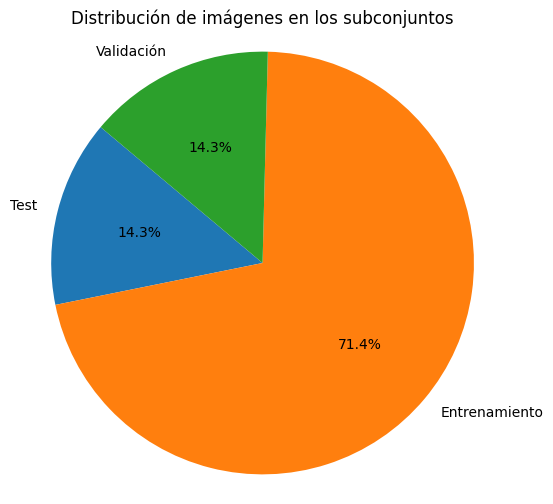

In [ ]:
# Calcular el número total de imágenes en cada división del conjunto de datos
total_test = sum(test_counts.values())
total_train = sum(train_counts.values())
total_validation = sum(validation_counts.values())

# Preparación de los datos para el gráfico
labels = 'Test', 'Entrenamiento', 'Validación'
sizes = [total_test, total_train, total_validation]

# Mostrar el resultado
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribución de imágenes en los subconjuntos")
plt.show()

# 3. Acondicionamiento de los datos

In [ ]:
# Funciones auxiliares para crear generadores
def create_train_generator(datagen, batch_size=128):
    return datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

def create_validation_generator(datagen, batch_size=128):
    return datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Configurar el ImageDataGenerator para los datos de train y val
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Crear los generadores de imagenes
train_generator = create_train_generator(train_datagen)
validation_generator = create_validation_generator(validation_datagen)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Inspeccionamos las muestras obtenidas con el generador

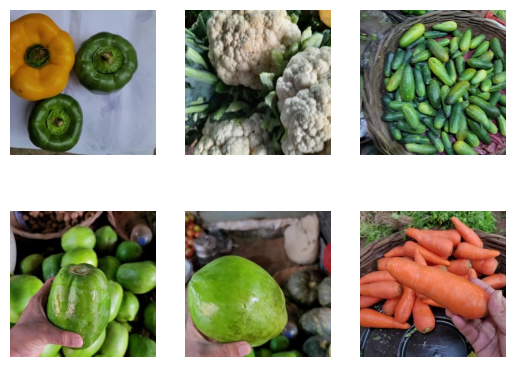

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Mostrar unas imágenes de ejemplo del generador
fig, axes = plt.subplots(2, 3)
batch = next(train_generator)
for i in range(2):
  for j in range(3):
    image = batch[0][random.randint(0, batch_size-1)] * 255  # Reescalar al rango [0, 255] para visualizarlas
    axes[i, j].imshow(image.astype('uint8'))
    axes[i, j].axis('off')
plt.show()

Cargar los datos a partir de los directorios para test

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

def load_data(path):
    images = []
    labels = []
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            for image_path in os.listdir(class_path):
                image = cv2.imread(os.path.join(class_path, image_path))
                image = cv2.resize(image, (224, 224))  # adjust this to the size of your images
                images.append(image.astype("float32") / 255)
                labels.append(class_dir)
    return np.array(images), np.array(labels)

x_test, y_test = load_data(test_path)

Binarizar los datos (dar formato OHE)

In [ ]:
lb = LabelBinarizer()
y_test_ohe = lb.fit_transform(y_test)
label_names = lb.classes_

Visualizar el resultado del acondicionamiento

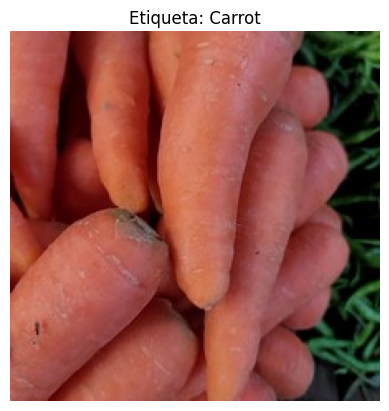

One-hot-encoded label: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Mostrar una imagen del conjunto de test
sample_idx = random.randint(0, x_test.shape[0] - 1)

image = x_test[sample_idx, :, :]
label = y_test_ohe[sample_idx]

# Visualizamos
plt.title("Etiqueta: " + str(label_names[label.argmax(axis=0)]))
plt.imshow((image[:, :, ::-1] * 255).astype('uint8'))
plt.axis("off")
plt.show()
print(f"One-hot-encoded label: {label}")


# 4. Estrategia 1: Modelo from scratch

## 4.1 Desarrollo de la arquitectura

Para obtener un modelo que consiga clasificar las imágenes del dataset en sus clases correspondientes, se parte de una arquitectura CNN similar a las estudiadas en la asignatura. Seguidamente, se optimizan diferentes características o hiperparámetros de la red:


*   **Profundidad de la red**. Se prueban modelos con un número distinto de bloques convolucionales en el *base model*. Este número de bloques viene definido por el parámetro ```num_blocks```.

*   **Neuronas en las capas convolucionales**. El número de neuronas en dichas capas viene dado por el parámetro ```hidden_units```.
*   **Tasa de aprendizaje**. Dada por el parámetro ```learning_rate```.
*   **Optimizador**. El algoritmo de optimización utilizado para ajustar los pesos de la red durante el entrenamiento viene dado por el parámetro ```optimizer_choice```.
*   **Dropout rate**. Determina la proporción de neuronas cuya salida se ignorará o bloqueará durante el entrenamiento, lo que puede prevenir el overfitting. Esta proporción está expresada en tanto por uno en el parámetro ```dropout_rate```.
*   **Regularización L2**. Esta regularización penaliza los pesos muy altos en las neuronas pero, a diferencia de L1, no suele provocar que el valor de los mismos sea cero y, por tanto, no elimina características, lo que la hace preferible a la L1. El uso de esta regularización viene dado por el parámetro ```l2_reg```.
*   **Batch normalization**. Esta nomralización aplicada sobre las entradas de una capa ayuda a a estabilizar el proceso de aprendizaje y puede reducir el número de épocas necesarias para entrenar la red, permitiendo que converja más rápido. La inclusión o no de *batch normalization* viene dada por el parámetro  ```batch_normalization```.


In [ ]:
!pip install -q keras-tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


**Constructor del modelo**

In [ ]:
def build_model(hp):
    # Configuración de los hiperparámetros
    input_shape = (224, 224, 3)
    num_classes = 15
    hidden_units = hp.Choice('hidden_units', values=[32, 64])
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    optimizer_choice = hp.Choice('optimizer', values=['SGD', 'Adam', 'Adagrad'])
    num_blocks = hp.Int('num_blocks', min_value=1, max_value=3, step=1)
    dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.25, 0.5])
    l2_reg = hp.Boolean('l2_reg')
    batch_normalization = hp.Boolean('batch_normalization')

    # Definición del modelo CNN

    # 1.BASE MODEL
    model = Sequential()
    for i in range(num_blocks):
        model.add(layers.Conv2D(hidden_units * (2 ** (i)), (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.1) if l2_reg else None))
        if batch_normalization:
            model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(hidden_units * (2 ** (i)), (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.1) if l2_reg else None))
        if batch_normalization:
            model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2,2)))

    # 2.TOP MODEL
    model.add(layers.GlobalAvgPool2D())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Configuración del optimizador a utilizar
    if optimizer_choice == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'Adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

**Optimización de hiperparámetros**

Los hiperparámetros serán optimizados utilizando la implementación incluida en Keras Tuner del algoritmo **Hyperband**. Este algoritmo basado en el concepto de *multi-armed bandit*, de manera que realiza una búsqueda por etapas. En primer lugar, explora un alto número de hiperparámetros pero utilizando un número bajo de *epochs* para entrenar la red. En las iteraciones siguientes, selecciona las combinaciones de hiperaparámetros que han obtenido un mejor resultado y aumenta el número de *epochs* para entrenarlas.

Se repite el proceso hasta seleccionar la arquitectura que ofrece mejores resultados para el número de *epochs* máximo (configurado con el argumento ```max_epochs```, fijado en 24 en este caso).

El ```batch_size``` utilizado es de 128. Además, para el entrenamiento se ha utilizado un *callback* de *early stopping* que supervisa la pérdida en validación (```val_loss```) y tiene una paciencia de 5 épocas.

Por último, cabe mencionar que se ha utilizado un subconjunto de los datos de entrenamiento para realizar esta optimización de hiperparámetros, por lo que se han utilizado un total de 9000 imágenes del subconjunto de *train* (un 60% del conjunto de *train* original). El conjunto de validación se ha mantenido con 3000 imágenes.

In [ ]:
# Configurar el ImageDataGenerator para los datos de train y val
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = create_train_generator(train_datagen)
validation_generator = create_validation_generator(validation_datagen)

Found 9000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import datetime, os

# Inicialización del tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=24,
    factor=3,
    directory=DATASET_DIR + "models",
    project_name='keras_tuner_cnn_hyperband'
)

# Callback para early stopping
stop_early = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5)

# Ejecución de la búsqueda de hiperparámetros
tuner.search(train_generator,
             validation_data=validation_generator,
             epochs=20,
             callbacks=[stop_early])

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores hiperparámetros encontrados: {best_hps.values}")

Trial 30 Complete [00h 06m 09s]
val_accuracy: 0.16033333539962769

Best val_accuracy So Far: 0.9629999995231628
Total elapsed time: 02h 01m 02s
Mejores hiperparámetros encontrados: {'hidden_units': 64, 'learning_rate': 0.001, 'optimizer': 'Adam', 'num_blocks': 3, 'dropout_rate': 0.25, 'l2_reg': False, 'batch_normalization': False, 'tuner/epochs': 24, 'tuner/initial_epoch': 8, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


En la salida anterior se puede comprobar cuál ha sido la mejor combinación de hiperparámetros encontrada. A continuación se justifica brevemente este resultado.


*   **Profundidad de la red: 3 bloques convolucionales**. La red más profunda entre las probadas es la que mejores resultados ha obtenido. Esto es probablemente porque una red más profunda permite aprender patrones más complejos. Sin embargo, se corre el riesgo de sufrir *overfitting*.
*   **Neuronas en las capas convolucionales**. El número de neuronas también es el más alto de entre los probados. Esto puede ayudar a la red a generalizar mejor.
*   **Tasa de aprendizaje: 0.001**. La tasa que mejor ha funcionado ha sido la más pequeña.
*   **Optimizador: Adam**. Adam es un optimizador muy flexible y equilibrado que combina las ventajas de otros como los dos propuestos: SGD y Adagrad.
*   **Dropout rate: 0.25**. Se ha elegido un *dropout rate* medio, que proporciona un buen balance entre mantener la capacidad de la red y su capacidad de generalización (reducir el *overfitting*).
*   **Regularización L2: Desactivada**. El modelo no parece presentar *overfitting*, por lo que no ha sido necesaria esta regularización.
*   **Batch normalization**. La normalización no parece haber tenido un efecto positivo, lo que podría explicarse porque las entradas ya tienen valores relativamente estables en cuanto a su magnitud.



## 4.2 Entrenamiento y monitorización



A continuación, se entrenará la red con la arquitectura obtenida en el paso anterior. Se van a realizar dos entrenamientos:



1.   Con todos los datos de *train*.
2.   Con los datos de *train*, aplicando *data augmentation* sobre ellos.





In [ ]:
max_epochs = 1000
batch_size = 128

# Funciones base
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

### 4.2.1 Entrenamiento sin *data augmentation*

In [ ]:
# Configurar el ImageDataGenerator para los datos de train y val
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = create_train_generator(train_datagen)
validation_generator = create_validation_generator(validation_datagen)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# Generamos un nuevo modelo con los mejores hiperparámetros
cnn_model_128 = build_model(best_hps)
cnn_model_128.compile(optimizer=cnn_model_128.optimizer,
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])

# Entrenar el modelo con el dataset aumentado
H = cnn_model_128.fit(train_generator,
                  validation_data=validation_generator,
                  epochs=max_epochs,
                  callbacks=[stop_early])

Epoch 1/1000
118/118 [==============================] - 80s 665ms/step - loss: 2.0254 - accuracy: 0.3021 - val_loss: 1.4935 - val_accuracy: 0.4980
Epoch 2/1000
118/118 [==============================] - 80s 675ms/step - loss: 1.3626 - accuracy: 0.5401 - val_loss: 1.1413 - val_accuracy: 0.6237
Epoch 3/1000
118/118 [==============================] - 79s 672ms/step - loss: 1.0099 - accuracy: 0.6644 - val_loss: 0.8798 - val_accuracy: 0.7243
Epoch 4/1000
118/118 [==============================] - 80s 673ms/step - loss: 0.8226 - accuracy: 0.7369 - val_loss: 0.5988 - val_accuracy: 0.8170
Epoch 5/1000
118/118 [==============================] - 80s 675ms/step - loss: 0.6246 - accuracy: 0.7985 - val_loss: 0.4605 - val_accuracy: 0.8540
Epoch 6/1000
118/118 [==============================] - 80s 674ms/step - loss: 0.4913 - accuracy: 0.8487 - val_loss: 0.5083 - val_accuracy: 0.8573
Epoch 7/1000
118/118 [==============================] - 80s 674ms/step - loss: 0.4450 - accuracy: 0.8604 - val_loss: 0

Visualización de la curva de aprendizaje

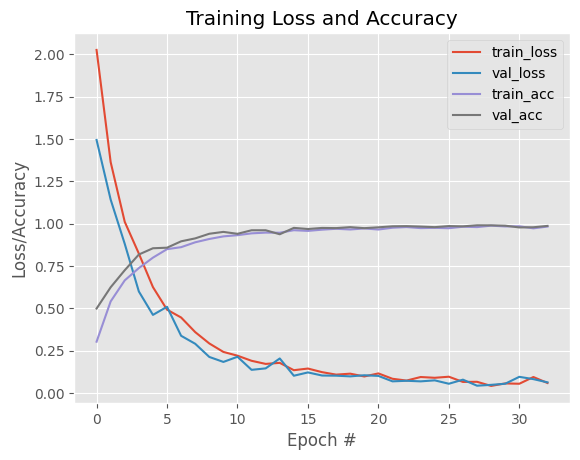

In [ ]:
visualize_learning_curve(H)

Como se puede ver en la curva de aprendizaje anterior, no parece que haya *overfitting*, ya que las curvas de *accuracy* y *loss* con datos de entrenamiento y validación son muy similares durante todo el proceso. De hecho, en la mayor parte del gráfico, los resultados en validación son mejores que para los datos de entrenamiento.

### 4.2.2 Entrenamiento con *data augmentation*

Se configura el *generator* de *train* para que utilice *data augmentation*, con una configuración similar a la estudiada en la asignatura

In [ ]:
# Configurar el ImageDataGenerator para los datos de train y val
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1./255)

Inspeccionamos las muestras generadas sintéticamente

Found 15000 images belonging to 15 classes.


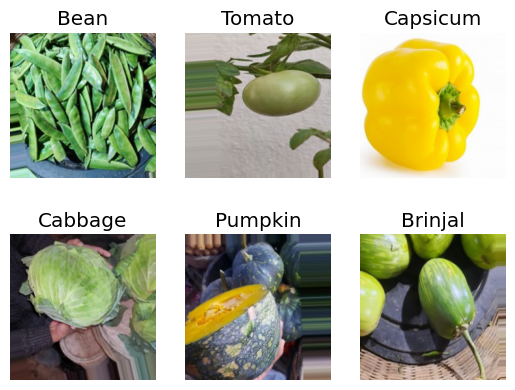

In [ ]:
train_generator = create_train_generator(train_datagen)

%matplotlib inline

fig, axes = plt.subplots(2, 3)
batch = next(train_generator)
for i in range(2):
  for j in range(3):
    idx = random.randint(0, batch_size-1)
    image = batch[0][idx] * 255
    label = batch[1][idx]
    axes[i, j].imshow(image.astype('uint8'))
    axes[i, j].set_title(str(label_names[label.argmax(axis=0)]))
    axes[i, j].axis('off')
plt.show()

Entrenamiento del modelo **con aumentación**

In [ ]:
# Debe reiniciarse el generador para no perder las
# imágenes mostradas anteriormente
train_generator = create_train_generator(train_datagen)
validation_generator = create_validation_generator(validation_datagen)

# Generamos un nuevo modelo con los mejores hiperparámetros
cnn_model_128_aug = build_model(best_hps)
cnn_model_128_aug.compile(optimizer=cnn_model_128_aug.optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenar el modelo con el dataset aumentado
H_aug = cnn_model_128_aug.fit(train_generator,
                  validation_data=validation_generator,
                  epochs=max_epochs,
                  callbacks=[stop_early])

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/1000
118/118 [==============================] - 174s 1s/step - loss: 2.0952 - accuracy: 0.2730 - val_loss: 1.6618 - val_accuracy: 0.4390
Epoch 2/1000
118/118 [==============================] - 173s 1s/step - loss: 1.6052 - accuracy: 0.4568 - val_loss: 1.3151 - val_accuracy: 0.5763
Epoch 3/1000
118/118 [==============================] - 173s 1s/step - loss: 1.3259 - accuracy: 0.5573 - val_loss: 1.0233 - val_accuracy: 0.6777
Epoch 4/1000
118/118 [==============================] - 172s 1s/step - loss: 1.0478 - accuracy: 0.6521 - val_loss: 0.9026 - val_accuracy: 0.7097
Epoch 5/1000
118/118 [==============================] - 173s 1s/step - loss: 0.8921 - accuracy: 0.7090 - val_loss: 0.6857 - val_accuracy: 0.7703
Epoch 6/1000
118/118 [==============================] - 172s 1s/step - loss: 0.7209 - accuracy: 0.7688 - val_loss: 0.6228 - val_accuracy: 0.8010
Epoch 7/1000
118/118 [=====================

Visualización de la curva de aprendizaje

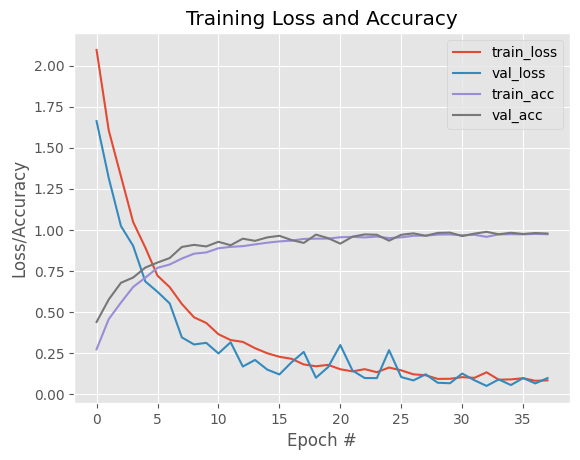

In [ ]:
visualize_learning_curve(H_aug)

## 4.2.3 Conclusiones del entrenamiento
Durante la optimización de hiperparámetros, hemos visto cómo la red elegida ha sido la más compleja (más profunda y con bloques más grandes), y los mecanismos de prevención de *overfitting* no han sido seleccionados a excepción del *dropout*. Esto ya podría señalar que la red no sufre *overfitting*.

Al realizar el experimento de entrenar la red completa con *data augmentation*, hemos podido comprobar que el resultado no mejora y, además, hemos corroborado definitivamente que no existe *overfitting*.

## 4.3 Evaluación del modelo

Por último, se evalúa la red con el conjunto de *test* para obtener una indicación de cómo se comportaría nuestro modelo en un escenario real, es decir, con datos que no ha visto nunca.

In [ ]:
import tensorflow as tf

# comprobación de GPUs disponibles
def check_GPU():
    GPUs = tf.config.list_physical_devices('GPU')
    print("GPUs: ", GPUs)
    if len(GPUs) == 0:
        print("Warning: no se ha detectado GPU, el entrenamiento puede ser muy lento!")

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, test_generator):
    # obtenemos las predicciones para nuestro set de test
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    precision = precision_score(true_classes, predicted_classes, average='weighted')
    recall = recall_score(true_classes, predicted_classes, average='weighted')
    f1 = f1_score(true_classes, predicted_classes, average='weighted')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

In [ ]:
test_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# evaluamos el dataset de test para ver los resultados
evaluate_model(cnn_model_128, test_generator)

Found 3000 images belonging to 15 classes.
94/94 [==============================] - 10s 61ms/step
Precision: 0.991045958783095
Recall: 0.991
F1-score: 0.990995482583962


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plotting accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Plotting loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# 5. Estrategia 2: Red pre-entrenada

## 5.1 Arquitectura InceptionResNetV2

Dentro de las arquitecturas propuestas en las indicaciones de este trabajo (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet), se ha elegido una InceptionResNetV2, pues como se puede ver en https://keras.io/api/applications/ es una de las que mejores precisiones logra en la base de datos *'ImageNet'*.

Se trata de una arquitectura con un tamaño intermedio, pues su tamaño es de 215MB, pero existen arquitecturas mucho más pesadas, como las VGGs que tienen un tamaño de 549MG aproximadamente y también existen otras mucho más pequeñas como las MobileNets que tienen un tamaño de aproximadamente 15MB.

InceptionResNetV2 cuenta con 55,9 millones de parámetros y logra una precisión del 80,3% en el conjunto de *'Imagenet'*.

Esta arquitectura fue propuesta en 2017 por *Szegedy, Ioffe et at* como una variación de la arquitectura InceptionResNetV1 habían propuesto en 2015 (*Szegedy, Vanhoucke et at*). Esta arquitectura surge como una adaptación de la Inception al *Computer Vision*

---

Bibliografía

Szegedy, C., Ioffe, S., Vanhoucke, V., & Alemi, A. (2017). Inception-v4, Inception-ResNet and the impact of residual connections on learning. Proceedings of the ... AAAI Conference on Artificial Intelligence. AAAI Conference on Artificial Intelligence, 31(1). https://doi.org/10.1609/aaai.v31i1.11231

Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2015). Rethinking the inception architecture for computer vision. https://doi.org/10.48550/ARXIV.1512.00567





### 5.1.1. Transfer Learning

En primer lugar se va realizar una tarea de *transfer learning*, es decir, se van a mantener los pesos del *base model* que la red ha aprendido durante su entrenamiento con la base de datos *'ImageneNet'* y para adaptar dicha red al dataset de trabajo, se va a entrenar un nuevo *top model*. Para ello, se va a congelar el *base model* y se va a mantener descongelado  el *top model*.

In [ ]:
#Se realizan diferentes importaciones que se van a emplear a lo largo del
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


In [ ]:
#Se definen los hiperparámetros
batch_size=64
learning_rate=0.001
epochs=50
num_clases = count_directories(train_path)


In [ ]:
# Configurar el ImageDataGenerator para los datos de train y validation
train_datagen = ImageDataGenerator(rescale=1./255) #No se va a hacer ninguna transformación, solo se va a normalizar la imagen
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
#Se carga la arquitectura y sus pesos, no se incluye el top model, pues se quiere entrenar uno nuevo ajustado a la tarea de clasificación actual
base_model = InceptionResNetV2(weights="imagenet",
                   include_top=False, #No incluimos el top model, porque queremos crear un nuevo clasificador adaptado a nuestros datos
                   input_shape=(224, 224, 3))
base_model.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (

In [ ]:
#Se congela el base model para evitar que se vuelvan a ajustar sus pesos y se crea un nuevo top model, este permanecerá descongelado para que durante el entrenamiento se
#ajusten sus pesos y sea capaz de realizar la clasificación

base_model.trainable = False

# Se crea un modelo con el base model congelado y un nuevo top model
InceptionResNet_model = Sequential()
InceptionResNet_model.add(base_model)
# 2.TOP MODEL
InceptionResNet_model.add(layers.GlobalAvgPool2D())
InceptionResNet_model.add (layers.Dense(num_clases, activation="softmax"))
InceptionResNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 15)                23055     
                                                                 
Total params: 54359791 (207.37 MB)
Trainable params: 23055 (90.06 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [ ]:
#Se compila el modelo
InceptionResNet_model.compile(optimizer=Adam(learning_rate=learning_rate),
                   loss="categorical_crossentropy", metrics=["accuracy"]) #Utilizamos loss="categorical_crossentropy" porque con el generador proporcionamos las salidas en One-Hot
                   #Encoding, esto es así porque hemos puesto class_mode = 'categorical'

In [ ]:

#Se define el callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H = InceptionResNet_model.fit(train_generator, batch_size=train_generator.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=early_stopping)

InceptionResNet_model.save("InceptionResNet_model.h5")


Epoch 1/50
234/234 [==============================] - 125s 402ms/step - loss: 0.3116 - accuracy: 0.9124 - val_loss: 0.1000 - val_accuracy: 0.9715
Epoch 2/50
234/234 [==============================] - 101s 430ms/step - loss: 0.0718 - accuracy: 0.9833 - val_loss: 0.0542 - val_accuracy: 0.9888
Epoch 3/50
234/234 [==============================] - 89s 379ms/step - loss: 0.0459 - accuracy: 0.9899 - val_loss: 0.0427 - val_accuracy: 0.9871
Epoch 4/50
234/234 [==============================] - 95s 407ms/step - loss: 0.0328 - accuracy: 0.9933 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 5/50
234/234 [==============================] - 89s 381ms/step - loss: 0.0255 - accuracy: 0.9958 - val_loss: 0.0289 - val_accuracy: 0.9929
Epoch 6/50
234/234 [==============================] - 95s 404ms/step - loss: 0.0208 - accuracy: 0.9959 - val_loss: 0.0240 - val_accuracy: 0.9935
Epoch 7/50
234/234 [==============================] - 95s 405ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.0228 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


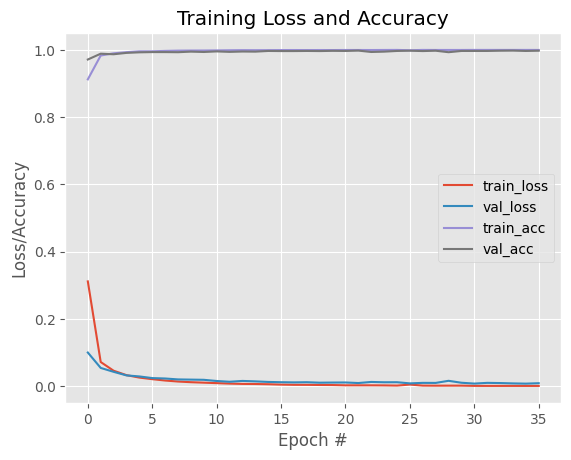

In [ ]:
#A continuación se visualizan las curvas de la precisión y de las perdidas tanto del entrenamiento como de la validación a lo largo de todo
#el entrenamiento
visualize_learning_curve(H)

In [ ]:
#Se realiza la evaluación
test_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

print("[INFO]: Evaluando red neuronal...")
evaluate_model(InceptionResNet_model, test_generator)

Found 3000 images belonging to 15 classes.
[INFO]: Evaluando red neuronal...
47/47 [==============================] - 24s 412ms/step
Precision: 0.9973449091177775
Recall: 0.9973333333333333
F1-score: 0.997333310416211


Aunque los resultados obtenidos en test son muy buenos, pues se consiguen valores de preción o de *F1-score* del 99,73%, se puede comprobar que se está produciendo cierto *overfitting*, pues los valores de pérdidas de validación son mayores que los de entrenamiento, es por ello que se van a probar diferentes técnicas de regularización para comprobar si estas pueden evitar o reducir el *overfitting* producido.

#### Técnicas de regularización




##### 1. Dropout

A continuación, se van a probar diferentes técnicas de regularización.
En primer lugar, se va a comprobar si la introducción de capas de Dropout hace que la red consiga mayor poder de generalización y se reduza el *overfitting*

In [ ]:
#Se congela el base model
base_model.trainable = False

# Se crea un modelo con el base model congelado y un nuevo top model
InceptionResNet_model_dropout = Sequential()
InceptionResNet_model_dropout.add(base_model)
# 2.TOP MODEL
InceptionResNet_model_dropout.add(layers.GlobalAvgPool2D())
InceptionResNet_model_dropout.add(layers.Dropout(0.25))
InceptionResNet_model_dropout.add(layers.Dense(num_clases, activation="softmax"))
InceptionResNet_model_dropout.summary()

InceptionResNet_model_dropout.compile(optimizer=Adam(learning_rate=learning_rate),
                   loss="categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H_dropout = InceptionResNet_model_dropout.fit(train_generator, batch_size=train_generator.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=[early_stopping])

InceptionResNet_model_dropout.save("InceptionResNet_model_dropout.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense_1 (Dense)             (None, 15)                23055     
                                                                 
Total params: 54359791 (207.37 MB)
Trainable params: 23055 (90.06 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


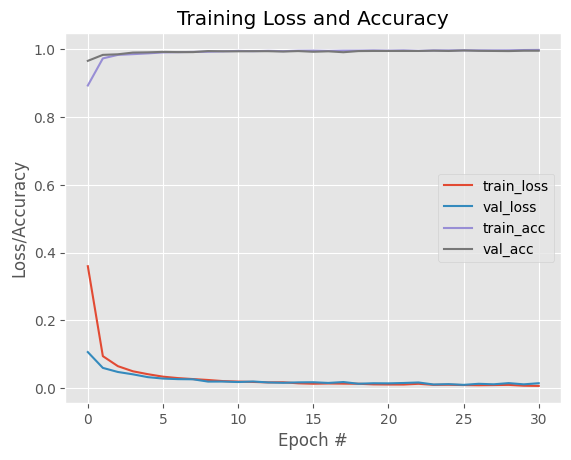

In [ ]:
#A continuación se visualizan las curvas de la precisión y de las perdidas tanto del entrenamiento como de la validación a lo largo de todo
#el entrenamiento
visualize_learning_curve(H_dropout)

In [ ]:
#Se evalue el modelo
print("[INFO]: Evaluando red neuronal...")
evaluate_model(InceptionResNet_model_dropout, test_generator)

[INFO]: Evaluando red neuronal...
47/47 [==============================] - 20s 305ms/step
Precision: 0.9976765840763181
Recall: 0.9976666666666667
F1-score: 0.9976666458328907


Se puede comprobar que al introducir una capa de *Dropout* en el *top model* se ha reducido un poco el *overfitting* generado y han mejorado ligeramente los resultados obtenidos en el test, se alcanzan precisiones del 99,77% aproximadamente.

##### 2. Data Augmentation
La siguiente técnica de regularización que se va a probar es la utilización de Data Augmentation, para lo que hay que cambiar los generadores de datos, estos se deben configurar para que realicen diferentes transformaciones como rotaciones, flips o zooms a las imagenes. Con esto se consigue que las imágenes varíen a lo largo del entrenamiento, que no sean siempre las mismas, permitiendo que la red aprenda patrones más genereles y no muy específicos del conjunto de datos de entrada con el que se trabaja.
Se pordría decir que el Data Augmentation consiste en la ampliación de forma 'artificial' del conjunto de datos de entrada.

In [ ]:
# Variables de configuración necesarias
batch_size = 64

# Configurar el ImageDataGenerator para los datos de train. Este generador realiza diferentes transformaciones sobre las imágenes
train_datagen_DA = ImageDataGenerator(rescale=1./255,
                                    rotation_range=15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip=True,
                                    vertical_flip= True)

train_generator_DA = train_datagen_DA.flow_from_directory(train_path,
                                                          target_size=(224, 224),
                                                          batch_size=batch_size,
                                                          class_mode='categorical')



Found 15000 images belonging to 15 classes.


In [ ]:
#Se congela el base model
base_model.trainable = False

# Se crea un modelo con el base model congelado y un nuevo top model
InceptionResNet_model_DA = Sequential()
InceptionResNet_model_DA.add(base_model)
# 2.TOP MODEL
InceptionResNet_model_DA.add(layers.GlobalAvgPool2D())
InceptionResNet_model_DA.add (layers.Dense(num_clases, activation="softmax"))
InceptionResNet_model_DA.summary()

#Se compila el modelo
InceptionResNet_model_DA.compile(optimizer=Adam(learning_rate=learning_rate),
                   loss="categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H_DA = InceptionResNet_model_DA.fit(train_generator_DA, batch_size=train_generator_DA.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator_DA.n//train_generator_DA.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=[early_stopping])
InceptionResNet_model_DA.save("InceptionResNet_model_DA.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 15)                23055     
                                                                 
Total params: 54359791 (207.37 MB)
Trainable params: 23055 (90.06 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________
Epoch 1/50
234/234 [==============================] - 276s 1s/step - loss: 0.3793 - accuracy: 0.8943 - val_loss: 0.1238 - val_accuracy: 0.963

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


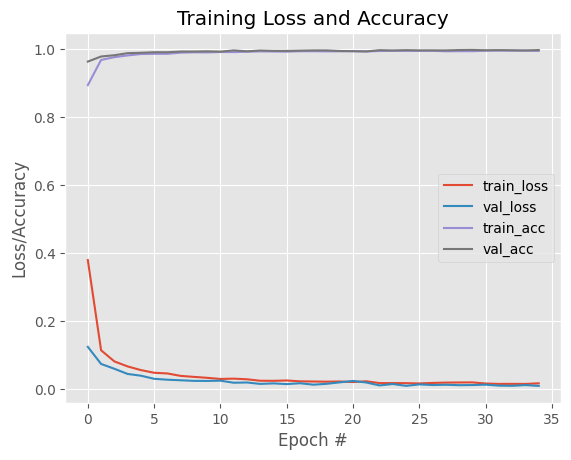

In [ ]:
#A continuación se visualizan las curvas de la precisión y de las perdidas tanto del entrenamiento como de la validación a lo largo de todo
#el entrenamiento
visualize_learning_curve(H_DA)

In [ ]:
#Se evalua el modelo
evaluate_model(InceptionResNet_model_DA, test_generator)

47/47 [==============================] - 22s 415ms/step
Precision: 0.9963662716834142
Recall: 0.9963333333333333
F1-score: 0.9963365856221603


Cabe mencionar dos aspectos relevantes:
1. Al utilizar Data Augmentation los tiempos de entrenamiento aumentan considerablemente
2. Han empeorado los resultados obtenidos en test

### 5.1.1. Fine Tuning

Se va a realizar *Fine Tuning* parcial sobre una red entrenada, esto consiste en la 'congelación' de una parte de la red y la 'descongelación' de otra parte, con esto se consigue entrenar ciertos parámetros de la red, no solo el *top model* como ocurre en el caso de *transfer learning*, al mismo tiempo que se mantienen otros pesos aprendidos durante el entrenamiento.

Con esto se consigue ajustar aún más la red al problema específico que se trata y normalmente se suele congelar los bloques iniciales de la red, donde se aprenden los patrones más generales y se vuelven a entrenar los últimos bloques de la misma, en los que se realiza el aprendizaje de los patrones más específicos.

Además, al descongelar capas de *BatchNormalization* se está introduciendo cierta regularización que en el caso del *transfer learning* no se realiza.

Como se han observado buenos resultados en el caso del transfer learning, solo se va a descongelar los dos últimos bloques de la red, que presentan la arquitectura de la imagen

<img src="" width="400">

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
#
base_model = InceptionResNetV2(weights="imagenet",
                   include_top=False, #No incluimos el top model, porque queremos crear un nuevo clasificador adaptado a nuestros datos
                   input_shape=(224, 224, 3))

219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
first_trained_layer = 'conv2d_196' #Capa que define el inicio del segundo bloque final de la red

for layer in base_model.layers:
  if layer.name == first_trained_layer:
    break
  layer.trainable = False
  print("Capa " + layer.name + " congelada...")

# base_model.summary()


Capa input_1 congelada...
Capa conv2d congelada...
Capa batch_normalization congelada...
Capa activation congelada...
Capa conv2d_1 congelada...
Capa batch_normalization_1 congelada...
Capa activation_1 congelada...
Capa conv2d_2 congelada...
Capa batch_normalization_2 congelada...
Capa activation_2 congelada...
Capa max_pooling2d congelada...
Capa conv2d_3 congelada...
Capa batch_normalization_3 congelada...
Capa activation_3 congelada...
Capa conv2d_4 congelada...
Capa batch_normalization_4 congelada...
Capa activation_4 congelada...
Capa max_pooling2d_1 congelada...
Capa conv2d_8 congelada...
Capa batch_normalization_8 congelada...
Capa activation_8 congelada...
Capa conv2d_6 congelada...
Capa conv2d_9 congelada...
Capa batch_normalization_6 congelada...
Capa batch_normalization_9 congelada...
Capa activation_6 congelada...
Capa activation_9 congelada...
Capa average_pooling2d congelada...
Capa conv2d_5 congelada...
Capa conv2d_7 congelada...
Capa conv2d_10 congelada...
Capa conv2d_

In [ ]:

# Conectar el modelo con el top model
ft_Inception_model = Sequential()
ft_Inception_model.add(base_model)
ft_Inception_model.add(layers.GlobalAvgPool2D())
ft_Inception_model.add(layers.Dense(num_clases, activation="softmax"))
ft_Inception_model.summary()

# Compilamos el modelo y entrenamos
ft_Inception_model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenamos el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=7, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H_ft = ft_Inception_model.fit(train_generator, batch_size=train_generator.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=[early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 15)                23055     
                                                                 
Total params: 54359791 (207.37 MB)
Trainable params: 7288591 (27.80 MB)
Non-trainable params: 47071200 (179.56 MB)
_________________________________________________________________
Epoch 1/50
234/234 [==============================] - 115s 433ms/step - loss: 0.0660 - accuracy: 0.9894 - val_loss: 0.0040 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


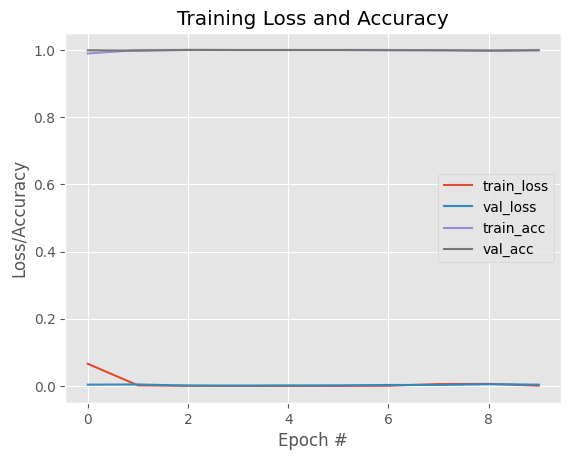

In [ ]:
visualize_learning_curve(H_ft)
ft_Inception_model.save('ft_Inception_model2.h5')

In [ ]:
# Configurar el ImageDataGenerator para los datos de train y val
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False)


Found 3000 images belonging to 15 classes.


In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(ft_Inception_model, test_generator)

47/47 [==============================] - 18s 317ms/step
Precision: 0.9980099174096514
Recall: 0.998
F1-score: 0.9980008125047657


Se puede comprobar que al entrenar no solo el *top model* sino también algunos bloques de la red los resultados obtenidos en el test son ligeramente inferiores a los obtenidos al hacer *transfer learning*

A continuación se va a entrenar esta misma red y haciendo *fine tuning* desde la misma capa pero cambiando el *top model* empleado. En lugar de utilizar uno basado en capas de *GlobalAveragePooling*, que es el más común en la actualidad, se va a utilizar otro compuesto por capas de *flatte* y capas densas.

In [ ]:
# Conectar el modelo con el top model
ft_Inception_model_dense = Sequential()
ft_Inception_model_dense.add(base_model)
ft_Inception_model_dense.add(layers.Flatten())
ft_Inception_model_dense.add(layers.Dense(256, activation="relu"))
ft_Inception_model_dense.add(layers.Dense(num_clases, activation="softmax"))
ft_Inception_model_dense.summary()

# Compilamos el modelo y entrenamos
ft_Inception_model_dense.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenamos el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H_ft_dense = ft_Inception_model_dense.fit(train_generator, batch_size=train_generator.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=[early_stopping])

# ft_Inception_model.save('ft_Inception_model_dense.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               9830656   
                                                                 
 dense_3 (Dense)             (None, 15)                3855      
                                                                 
Total params: 64171247 (244.79 MB)
Trainable params: 17100047 (65.23 MB)
Non-trainable params: 47071200 (179.56 MB)
_________________________________________________________________
Epoch 1/50
234/234 [==============================] - 120s 450ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


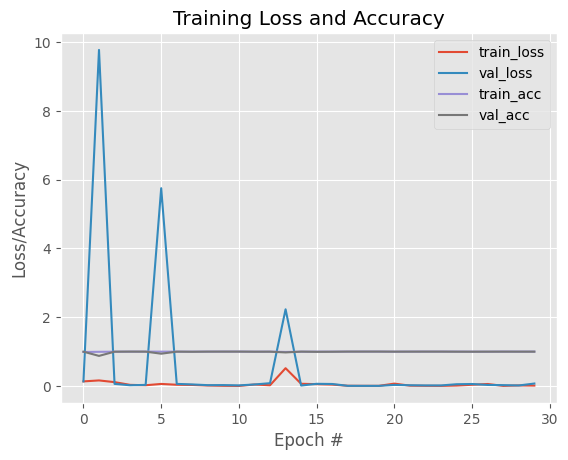

In [ ]:
visualize_learning_curve(H_ft_dense)

In [ ]:
#Evaluando el modelo de predicción con las imágenes de test
evaluate_model(ft_Inception_model_dense, test_generator)

47/47 [==============================] - 19s 315ms/step
Precision: 0.9976831847363841
Recall: 0.9976666666666667
F1-score: 0.9976666291658073


Se puede observar que con este *top model* el entrenamiento es más irregular que con el *top model* que utiliza capas de *GlobalAveragePooling* y los resultados obtenidos al evaluar el modelo en el conjunto de test son peores, aunque la diferencia es muy pequeña.

##### *Weight regularization*
Finalmente, se va a implementar la técnica de regularización basada en la penalización L1 y L2.
En primer lugar, se va a implementar unicamente una penalización L1, que realiza la siguiente operación sobre la función de pérdidas: loss = l1 * reduce_sum(abs(x)), siendo l1=0.01 en este caso.

In [ ]:
ft_Inception_model_l1 = Sequential()
ft_Inception_model_l1.add(base_model)
ft_Inception_model_l1.add(layers.Flatten())
ft_Inception_model_l1.add(layers.Dense(256, activation="relu", bias_regularizer=tf.keras.regularizers.l1()))
ft_Inception_model_l1.add(layers.Dense(num_clases, activation="softmax"))
ft_Inception_model_l1.summary()

# Compilamos el modelo y entrenamos
ft_Inception_model_l1.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenamos el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=7, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H_ft_l1 = ft_Inception_model_l1.fit(train_generator, batch_size=train_generator.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 256)               9830656   
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 64171247 (244.79 MB)
Trainable params: 17100047 (65.23 MB)
Non-trainable params: 47071200 (179.56 MB)
_________________________________________________________________
Epoch 1/50
234/234 [==============================] - 133s 437ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


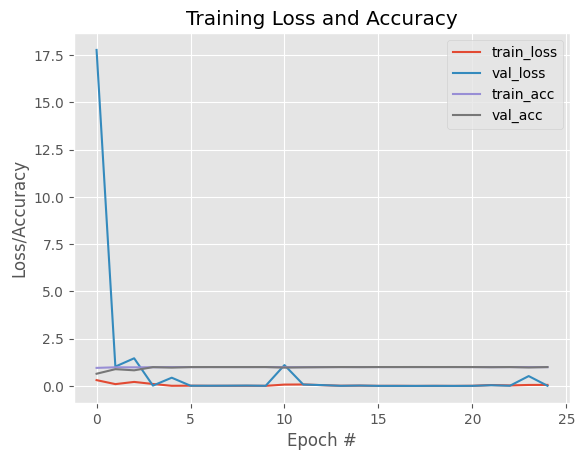

In [ ]:
visualize_learning_curve(H_ft_l1)
ft_Inception_model_l1.save('ft_Inception_model_l1.h5')

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(ft_Inception_model_l1, test_generator)

47/47 [==============================] - 22s 408ms/step
Precision: 0.998351428408042
Recall: 0.9983333333333333
F1-score: 0.9983349584981878


Se puede observar que el entrenamiento es bastante más estable que en el caso anterior, donde no se utilizaba ningún tipo de regularización. También cabe destacer la mejora de los resultados de test en un 0,1% aproximadamente.

Se va a implementar una regularización L1 y L2 al mismo tiempo, para comprobar si con esto se mejoran aún más los resultados. AL aplicar ambas regularizaciones al mismo tiempo se está realizando dos operaciones sobre la función de pérdidas:

1. Penalización L1: loss = l1 * reduce_sum(abs(x)) -> l1= 0.01
2. Penalización L2: loss = l2 * reduce_sum(square(x)) -> l2=0.01

In [ ]:
# Conectar el modelo con el top model
ft_Inception_model_l1l2 = Sequential()
ft_Inception_model_l1l2.add(base_model)
ft_Inception_model_l1l2.add(layers.Flatten())
ft_Inception_model_l1l2.add(layers.Dense(256, activation="relu", kernel_regularizer='l1_l2'))
ft_Inception_model_l1l2.add(layers.Dense(num_clases, activation="softmax"))
ft_Inception_model_l1l2.summary()

# Compilamos el modelo y entrenamos
ft_Inception_model_l1l2.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenamos el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=7, min_delta = 0.0003, restore_best_weights=True,verbose=1)

H_ft_l1l2 = ft_Inception_model_l1l2.fit(train_generator, batch_size=train_generator.batch_size, verbose=1,
                 epochs=epochs, steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size,
                callbacks=[early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 38400)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               9830656   
                                                                 
 dense_3 (Dense)             (None, 15)                3855      
                                                                 
Total params: 64171247 (244.79 MB)
Trainable params: 17100047 (65.23 MB)
Non-trainable params: 47071200 (179.56 MB)
_________________________________________________________________
Epoch 1/50
234/234 [==============================] - 118s 447ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


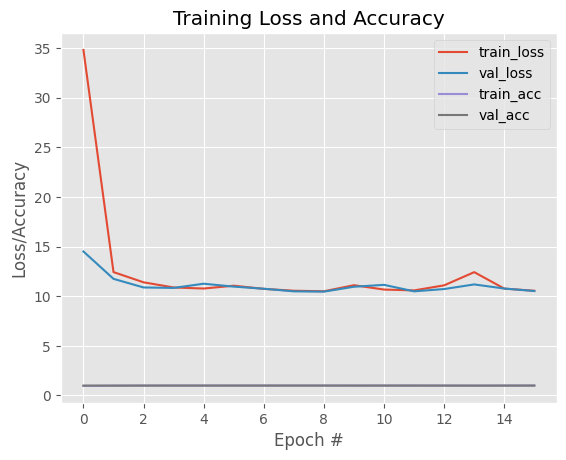

In [ ]:
visualize_learning_curve(H_ft_l1l2)
ft_Inception_model_l1l2.save('ft_Inception_model_l1l2.h5')

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(ft_Inception_model_l1l2, test_generator)

47/47 [==============================] - 17s 304ms/step
Precision: 0.9963564684826692
Recall: 0.9963333333333333
F1-score: 0.9963315788711513


Se puede observar que los resultados han empeorado con respecto de la utilización unicamente de la penalización L1, esto puede deberse a que la penalización realizada sea tan grande que no se esté permitiendo entrenar a la red todo lo posible.

## 5.2 Arquitectura DenseNet121

DenseNet121 es una arquitectura de red neuronal convolucional (CNN) popular y potente que fue propuesta por Huang et al. en su artículo "Densely Connected Convolutional Networks" en 2017.

La arquitectura DenseNet (Dense Convolutional Network) se destaca por su conexión densa entre capas, lo que significa que cada capa está conectada directamente a todas las capas posteriores en lugar de solo a la siguiente capa, como en las arquitecturas CNN tradicionales. Esto promueve el flujo de información y el reuso de características en la red.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

check_GPU()

batch_size = 32
epochs = 10
image_size = [224, 224]
num_classes = 15
learning_rate=0.0001

train_generator, validation_generator, test_generator = load_data_generators(batch_size=batch_size)

# cargamos el modelo DenseNet121 con pesos pre-entrenados
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=[*image_size, 3])

# permitimos únicamente re-entrenar algunas de las capas del DenseNet121
n_layers = len(base_model.layers)
n_trainable_layers = 6
print("DenseNet121 layers = ", n_layers)

for i, layer in enumerate(base_model.layers):
    if i < (n_layers - n_trainable_layers):
        layer.trainable = False
    else:
        print("Layer '{}' will be trained".format(layer.name))

# creamos un modelo secuencial con DenseNet121 como base y capas adicionales para nuestra clasificación
model = Sequential([
    base_model,
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])


GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
DenseNet121 layers =  427
Layer 'conv5_block16_1_bn' will be trained
Layer 'conv5_block16_1_relu' will be trained
Layer 'conv5_block16_2_conv' will be trained
Layer 'conv5_block16_concat' will be trained
Layer 'bn' will be trained
Layer 'relu' will be trained
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_10 (Flatten)        (None, 50176)             0         
                                                                 
 dense_20 (Dense)            (None, 32)                1605664   
                                                                 
 dense_21 (Dense)            (None, 15)                495       
                                                 

In [ ]:
# entrenamiento del modelo (lento con muchas épocas, especialmente sin GPU)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10
469/469 [==============================] - 37s 74ms/step - loss: 0.3477 - accuracy: 0.9001 - val_loss: 0.0284 - val_accuracy: 0.9943
Epoch 2/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0164 - accuracy: 0.9979 - val_loss: 0.0177 - val_accuracy: 0.9953
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.0099 - val_accuracy: 0.9973
Epoch 4/10
469/469 [==============================] - 34s 71ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 9.7948e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9987
Epoch 7/10
469/469 [==============================] - 33s 71ms/step - loss: 6.3831e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_a

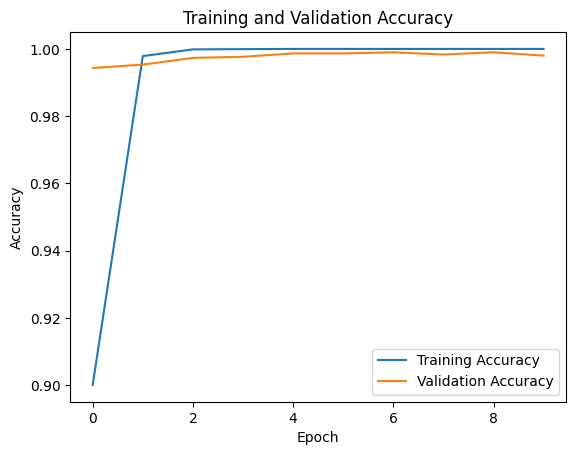

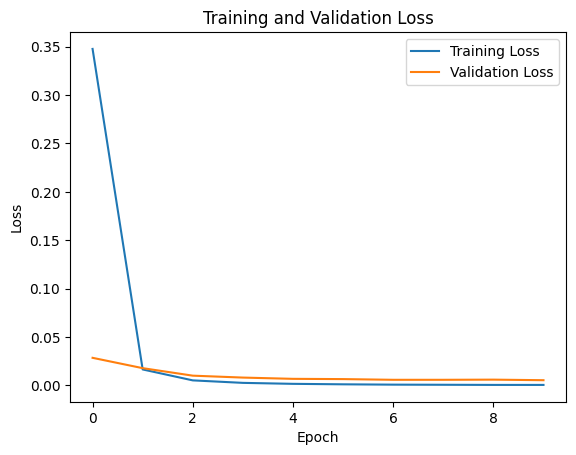

In [ ]:
# mostrar progreso durante el entrenamiento
plot_training_history(history)

In [ ]:
test_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# evaluamos el dataset de test para ver los resultados
evaluate_model(model, test_generator)

94/94 [==============================] - 5s 58ms/step
Precision: 0.9980099174096514
Recall: 0.998
F1-score: 0.997999979166224


### Data augmentation

A continuación vamos a tratar de mejorar los resultados aumentando los datos de entrenamiento con pequeñas transformaciones de las imágenes generadas por el generador ImageDataGenerator.

Para que la red se adapte mejor a las nuevas imágenes, hacemos un poco más de fine-tuning desbloqueando algunas capas adicionales de la red DenseNet121 y aumentamos el tamaño del batch a 64 para mejorar un poco la convergencia.

Otra novedad es que incluimos un número mayor de épocas con un criterio de parada mediante la clase EarlyStopping.

In [ ]:
batch_size = 64
epochs = 25
image_size = [224, 224]
num_classes = 15
learning_rate=0.0001

# cargamos el modelo DenseNet121 con pesos pre-entrenados
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=[*image_size, 3])

# permitimos únicamente re-entrenar algunas de las capas del DenseNet121
n_layers = len(base_model.layers)
n_trainable_layers = 16
print("DenseNet121 layers = ", n_layers)

for i, layer in enumerate(base_model.layers):
    if i < (n_layers - n_trainable_layers):
        layer.trainable = False
    else:
        print("Layer '{}' will be trained".format(layer.name))

# creamos un modelo secuencial con DenseNet121 como base y capas adicionales para nuestra clasificación
model = Sequential([
    base_model,
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])


GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
DenseNet121 layers =  427
Layer 'conv5_block15_0_bn' will be trained
Layer 'conv5_block15_0_relu' will be trained
Layer 'conv5_block15_1_conv' will be trained
Layer 'conv5_block15_1_bn' will be trained
Layer 'conv5_block15_1_relu' will be trained
Layer 'conv5_block15_2_conv' will be trained
Layer 'conv5_block15_concat' will be trained
Layer 'conv5_block16_0_bn' will be trained
Layer 'conv5_block16_0_relu' will be trained
Layer 'conv5_block16_1_conv' will be trained
Layer 'conv5_block16_1_bn' will be trained
Layer 'conv5_block16_1_relu' will be trained
Layer 'conv5_block16_2_conv' will be trained
Layer 'conv5_block16_concat' will be trained
Layer 'bn' will be trained
Layer 'relu' will be trained
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
    

Procedemos a configurar las posibles transformaciones (o rangos de transformación) de nuestras imágenes aumentadas y a visualizar algunas de las que producirá nuestro generador.

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


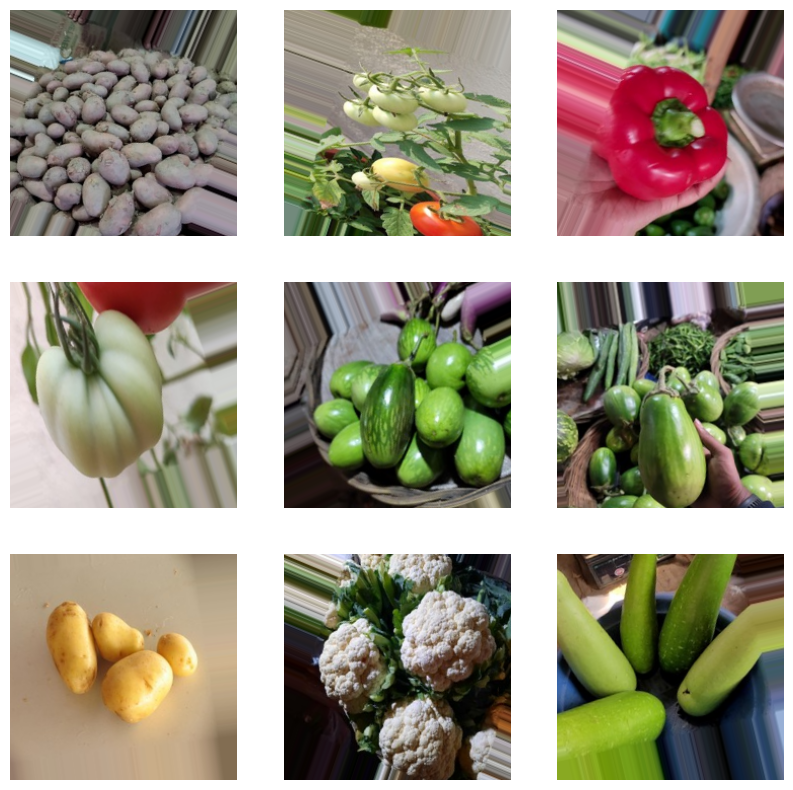

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=[1.0, 1.2],
    horizontal_flip=True
)

train_generator, validation_generator, test_generator = load_data_generators(train_datagen, batch_size)

visualize_generator_images(train_generator)

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# entrenamiento del modelo (lento con muchas épocas, especialmente sin GPU)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/25
235/235 [==============================] - 142s 566ms/step - loss: 0.4170 - accuracy: 0.8759 - val_loss: 0.0484 - val_accuracy: 0.9863
Epoch 2/25
235/235 [==============================] - 131s 558ms/step - loss: 0.0455 - accuracy: 0.9888 - val_loss: 0.0193 - val_accuracy: 0.9940
Epoch 3/25
235/235 [==============================] - 131s 559ms/step - loss: 0.0246 - accuracy: 0.9941 - val_loss: 0.0100 - val_accuracy: 0.9970
Epoch 4/25
235/235 [==============================] - 131s 556ms/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.0092 - val_accuracy: 0.9973
Epoch 5/25
235/235 [==============================] - 131s 557ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 6/25
235/235 [==============================] - 131s 559ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0069 - val_accuracy: 0.9980
Epoch 7/25
235/235 [==============================] - 131s 557ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0046 -

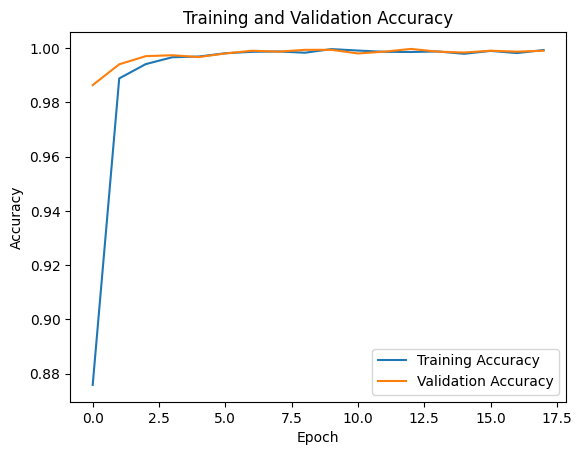

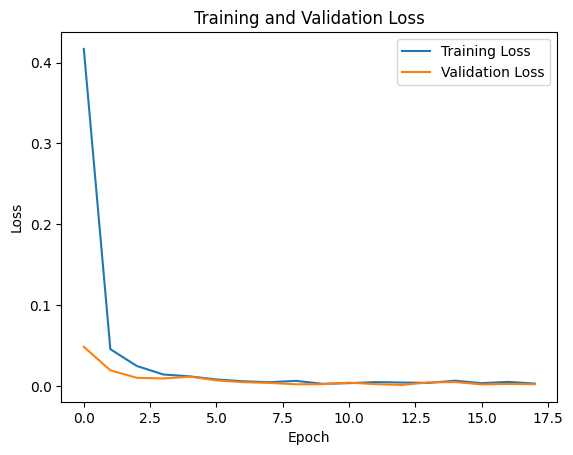

In [ ]:
# mostrar progreso durante el entrenamiento
plot_training_history(history)

In [ ]:
# evaluamos el dataset de test para ver los resultados
evaluate_model(model, test_generator)

47/47 [==============================] - 5s 112ms/step
Precision: 0.9996683250414594
Recall: 0.9996666666666667
F1-score: 0.9996666645833203


Como podemos observar, hemos logrado mejorar la precisión de nuestros resultados aún más, del 99.8 % al 99.96 %

## 5.3 Comparación de las arquitecturas de red pre-entreanadas

Se han probado dos arquitecturas de red diferentes, una InceptionResNetv2 y una DenseNet121. Una de las principales diferencias entre ambas es el número de parámetros que presentan:
- InceptionResNetV2: 55,9 millones de parámetros
- DenseNet121: 8,1 millones de parámetros

A pesar de esta diferencia tan grande en el número de parámetros, la diferencia de precisiones con la base de datos *Imagenet* es sólo del 5% aproximadamente (top-1 accuracy). Dado que en muchas ocasiones la memoria disponible es un factor muy limitante a la hora de entrenar una red neuronal, se ha querido comprobar la diferencia de resultados al clasificar imágenes de vegetales entre estas dos redes, una de gran tamaño y otra con mucho menor tamaño.

También se han querido comprobar los efectos que tienen diferentes técnicas de regularización en el entrenamiento de las redes.

A continuación, se va a mostrar una tabla resumiendo todos los resultados obtenidos:


<img src="https://drive.google.com/uc?id=1-jHFeU3aAh1qHJLTVCccyf1CEGufp2jG" width="400">

En primer lugar, mencionar que como era de esperar el uso de Data Augmentation hace que el tiempo de entrenamiento aumento, por ejemplo, en el caso de la red DenseNet121 se puede observar que el tiempo de entrenamiento de una epoch sin Data Augmentation es de 33s y si se aplica esta regularización el tiempo aumenta a 130s aproximadamente.

En segundo lugar, se van a comparar el efecto de las tres técnicas de regularización empleadas, *Dropout*, *Data Augmentation* y *weigth regularization*. En base a los resultados obtenidos, la utilización de *Dropout* sí que ha permitido la mejora de la generelación de la red, pero en el caso del *Data Augmentation*, la red sí que ha mejorado los resultados en el test en el caso de la DenseNet121, pero cuando se ha probado junto con la red InceptionResNetV2, no ha sido así, los resultados de test han empeorado. Esto puede deberse a que en el primero de los casos se está realizando *Data Augmentation* junto con *fine tuning*, en cambio, en el segundo caso se está utilizando junto con *transfer learning*, por lo que en esta última situación no se entrenan parámetros de la red, solo se ajusta el top model de la misma.

En cuanto al *weight regularization*, los resultados de test han mejorado cuando se ha realizado una penalización L1, pero han empeorado cuando se ha utilizado una penalización L1 y L2, puede que el motivo del empeoramiento sea que las penalizaciones han sido bruscas y que la red necesite unas más suaves.

En tercer lugar, se va a comparar la diferencia entre utilizar un *top model* formado por una capa de *GlobalAveragePolling*, que es el más común actualmente y otro basado en la utilización de capas densas y un *Flatten*. Se puede observar, que las precisiones alcanzadas con el *top model* con capas de *GlobalAveragePooling* son ligeramente mayores que con la utilización del otro *top model*. Además, el entrenamiento con este *top model* es más estable que el entrenamiento de la red con el *top model* con capas densas.

En cuanto a la comparación de los resultados obtenidos para la misma red haciendo *fine tuning* parcial y *transfer learning*, se puede observar que los precisiones obtenidas son bastante similares, 99,73% en *transfer leanring* y 99,80% en *fine tuning* parcial. Podría caber la posibilidad de que los resultados de *fine tuning* fueran mejores si se hubieran descongelado más bloques de la red y no solo los dos últimos.

Finalmente, se va a comparar la diferencia de resultados entre las dos arquitecturas probadas. Haciendo *fine tuning* con ambas arquitecturas y utilizando en ambos casos un *top model*  basado en capas  de *Flatten* y densas se obtienen mejores resultados con la arquitectura DenseNet121, que alcanza una precisión de 99,80%, mientras que con la InceptionResNetV2 se obtienen precisiones del 99,77%. Cabe mencionar que la diferencia es bastante pequeña, pero se ha comprobado que el tamaño de la red no es un factor limitante a la hora de obtener mejores resultados, se pueden alcanzar precisiones mayores con una red de menor tamaño, como es el caso.

# 6. Conclusiones

En base a los resultados obtenidos, se puede concluir que apesar de trabajar con un conjunto de imágenes de gran tamaño, pues este está formado por un total de 21000 imágenes, se consiguen mejores resultados al hacer *fine tuning* o *transfer learning* que al entrenar un modelo 'desde cero'. Además, cabe mencionar que los mejores resultados se han obtenido al hacer *fine tuning* parcial, por tanto, cuanta más parte de la red pre-entrenada se vuelva a entrenar mejores resultados se han alcanzado.  